In [3]:
!pip install zipcodes

Defaulting to user installation because normal site-packages is not writeable


In [4]:
pip install zipcodes --timeout 60

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install zipcodes -i https://pypi.org/simple

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
!pip install zipcodes

Defaulting to user installation because normal site-packages is not writeable


In [8]:
!pip install basemap

Defaulting to user installation because normal site-packages is not writeable


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipcodes as zcode
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.naive_bayes import ComplementNB
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier 
from warnings import filterwarnings
filterwarnings ('ignore')


In [10]:
Data = pd.read_csv('E:\Momeni-Machne Learning class momeni 21 01 1402\Machine Learning\zahra\session 22/Bank_Personal_Loan_Modelling(1)-P 1 classification.csv')
df=pd.DataFrame(Data)
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [11]:
# CCAvg cahnged : / to . in notepad++ 
df.describe(include='all')

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [12]:
# There are some neagtive in 'Experience' column,
# so we shoude change them to positive value, abs on 

In [13]:
df['Experience']=abs(df['Experience'])

In [14]:
df['Experience'].describe()

count    5000.000000
mean       20.134600
std        11.415189
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

In [15]:
# in this dataset all data are per year, 
# but CCavg is permonth so we change it to per month, by *12 

In [16]:
df['CCAvg'] = df['CCAvg']*12
df['CCAvg']

0       19.2
1       18.0
2       12.0
3       32.4
4       12.0
        ... 
4995    22.8
4996     4.8
4997     3.6
4998     6.0
4999     9.6
Name: CCAvg, Length: 5000, dtype: float64

In [17]:
# we donot need 'ID' column so delete it. 

In [18]:
df.drop(['ID'] ,axis=1, inplace=True)

In [19]:
df['ZIP Code'].nunique()

467

In [20]:
# zip code have 467 parameters .. it means 467 locations 

# check missing value 

In [21]:
df.isnull().sum()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

# Noise 

# Categorical

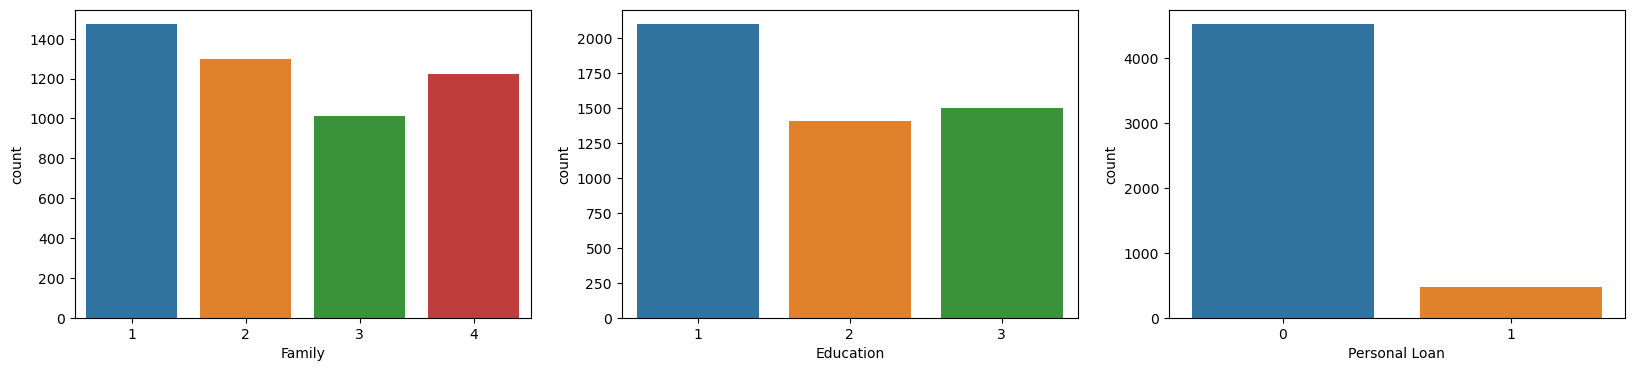

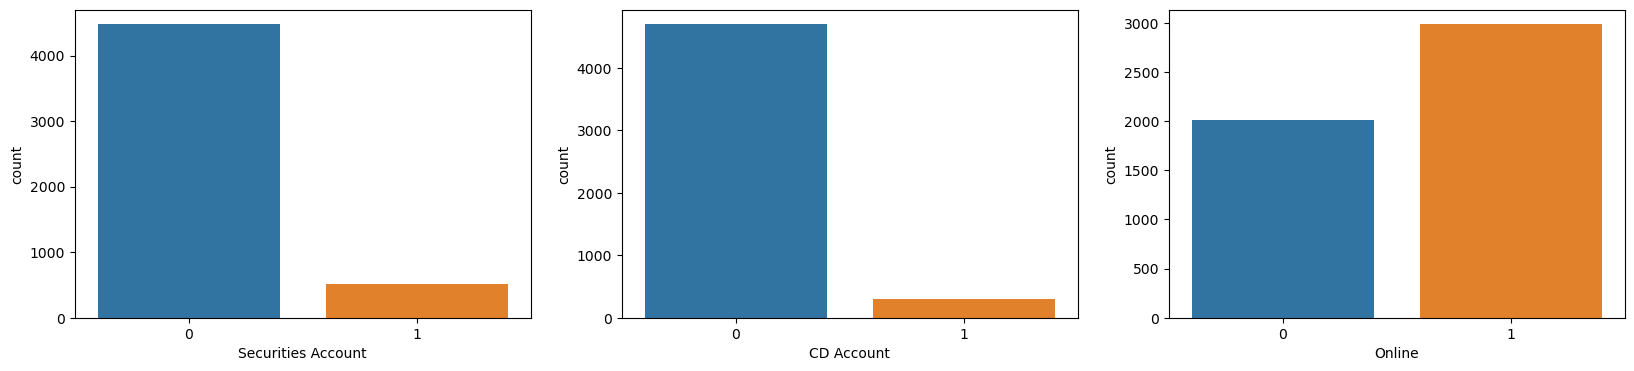

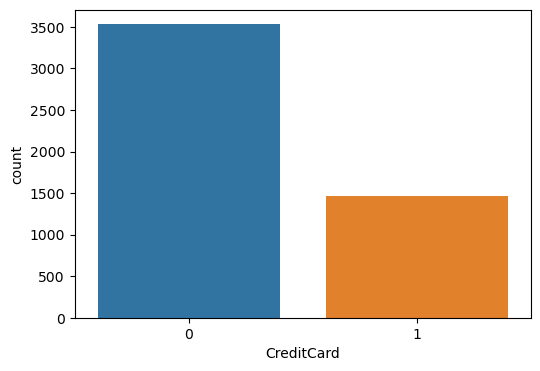

In [22]:
Categorical= ['Family','Education','Personal Loan','Securities Account','CD Account','Online','CreditCard']
i=0
while i<8:
    fig=plt.figure(figsize=[20,4])
    plt.subplot(1,3,1)   # (one row, 3 plots, first one)
    sns.countplot(x=Categorical[i],data=df) #read each one,from Data
    i += 1
    if i==7:
        break
    plt.subplot(1,3,2)
    sns.countplot(x=Categorical[i],data=df) # row=one, second plot 
    i += 1
    plt.subplot(1,3,3)
    sns.countplot(x=Categorical[i],data=df)   # row=one, second plot
    i += 1
    plt.show()

# Numerical 

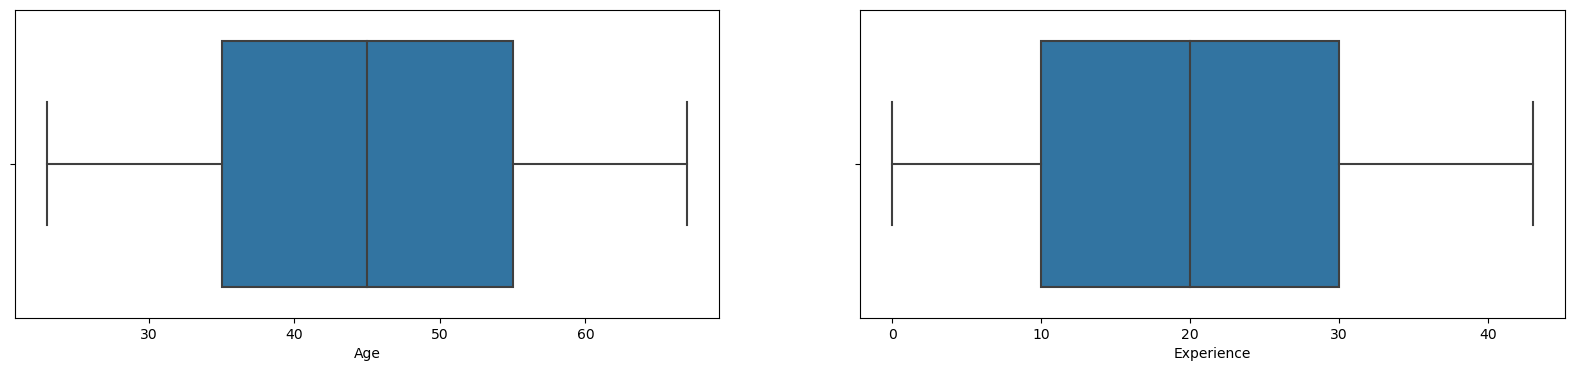

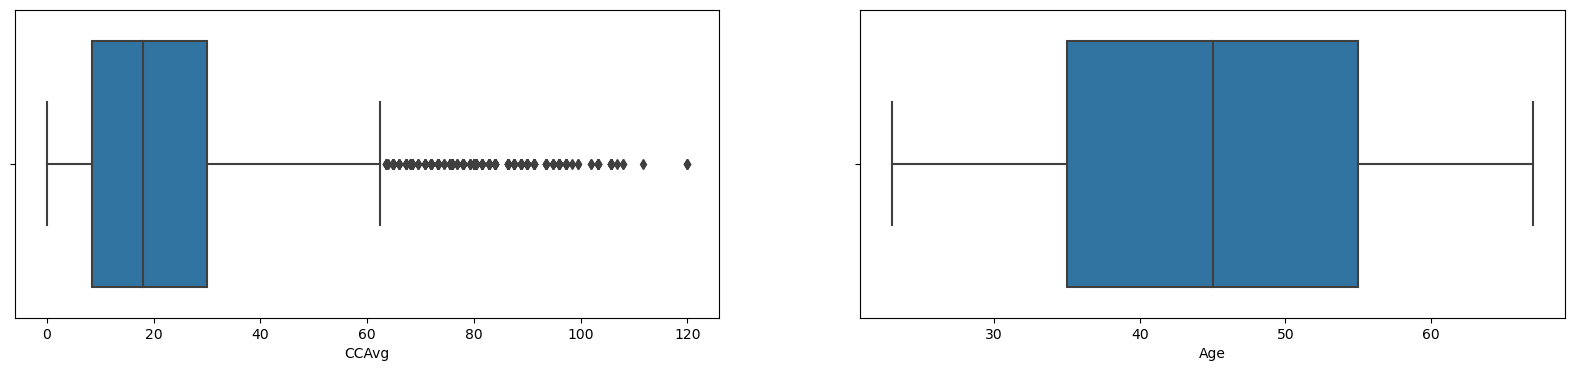

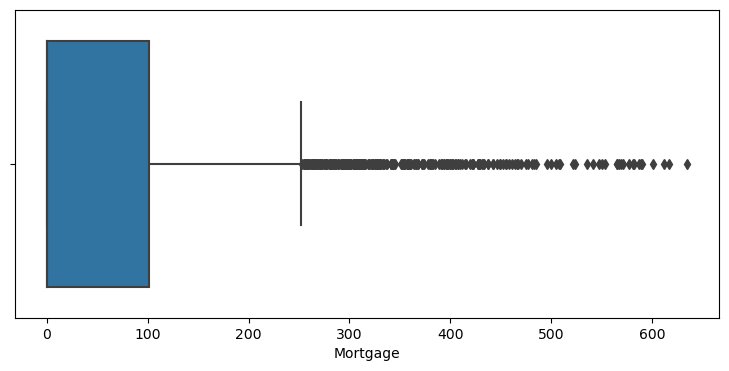

In [23]:
Numerical= ['Age','Experience','CCAvg','Age','Mortgage','Income']
i=0
while i<6:
    fig=plt.figure(figsize=[20,4])
    plt.subplot(1,2,1) # one row, two plots, first one
    sns.boxplot(x=Numerical[i],data=df)
    i += 1
    if i==5:
        break
    plt.subplot(1,2,2)
    sns.boxplot(x=Numerical[i],data=df) # row one, second plot
    i += 1
    plt.show()

# Zip Code

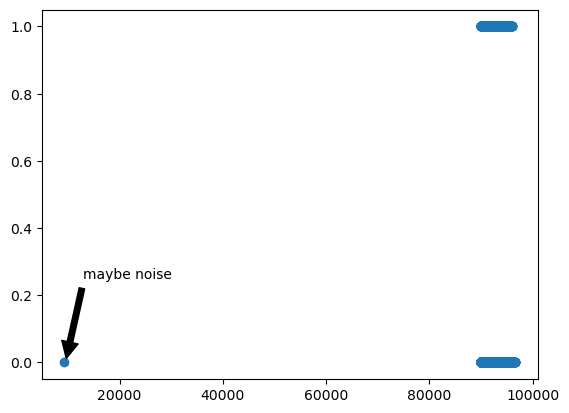

In [24]:
plt.scatter(df['ZIP Code'],df['Personal Loan'])
plt.annotate('maybe noise',xy=(9500,0),xytext=(13000, .25),arrowprops=dict(facecolor='black',shrink=0.05))
plt.show()
# The annotate() function in pyplot module of matplotlib library is used to annotate the point xy with teat s.


In [25]:
Noise_Zip = df[df['ZIP Code']<20000]
Noise_Zip

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
384,51,25,21,9307,4,7.2,3,0,0,0,0,1,1


In [26]:
df.drop(index=384, inplace=True)

In [27]:
# we want to see the name of twon of each zipcode 
# so I made a list to do so 
list_zipcode=list(df['ZIP Code'])

In [28]:
country=[] # To place countries
lat = [] # To latitude of each sample
long = [] # To longitude of each sample 
for x in list_zipcode : # this loop check each value of zip code 
    my_city_county = zcode.matching(str(x)) # Used as zipcode library
    if len (my_city_county) ==1: # There is information for this zip code if the value is one 
        County=my_city_county[0].get('county')
        Lat=my_city_county[0].get('lat')
        Long=my_city_county[0].get('long')
    else: # when there arenot any info for this zip code
        County='Notfound'
        Lat=np.NaN
        Long=np.NaN
    country.insert (0,County) # Insert to end of list
    lat.insert(0,Lat) # Insert to end of list
    long.insert(0,Long) # Insert to end of list
country.reverse() #Reverse list country
lat.reverse() # Reverse list lat
long.reverse() # reverse list long
# make make new columns
df['Place']=country
df['Latitude']=lat
df['Longitude']=long

In [29]:
# check to make sure about function 
print (zcode.matching(str(92612))) # This zip code for the end sample
df

[{'zip_code': '92612', 'zip_code_type': 'STANDARD', 'active': True, 'city': 'Irvine', 'acceptable_cities': [], 'unacceptable_cities': [], 'state': 'CA', 'county': 'Orange County', 'timezone': 'America/Los_Angeles', 'area_codes': ['714', '949'], 'world_region': 'NA', 'country': 'US', 'lat': '33.6615', 'long': '-117.8217'}]


,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Place,Latitude,Longitude
0,25,1,49,91107,4,19.2,1,0,0,1,0,0,0,Los Angeles County,34.1620,-118.0894
1,45,19,34,90089,3,18.0,1,0,0,1,0,0,0,Los Angeles County,34.0218,-118.2883
2,39,15,11,94720,1,12.0,1,0,0,0,0,0,0,Alameda County,37.8746,-122.2547
3,35,9,100,94112,1,32.4,2,0,0,0,0,0,0,San Francisco County,37.7217,-122.4446
4,35,8,45,91330,4,12.0,2,0,0,0,0,0,1,Los Angeles County,34.2429,-118.5273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,22.8,3,0,0,0,0,1,0,Orange County,33.6473,-117.8409
4996,30,4,15,92037,4,4.8,1,85,0,0,0,1,0,San Diego County,32.8668,-117.2482
4997,63,39,24,93023,2,3.6,3,0,0,0,0,0,0,Ventura County,34.5210,-119.2477
4998,65,40,49,90034,3,6.0,2,0,0,0,0,1,0,Los Angeles County,34.0293,-118.3994


In [30]:
df=df.astype({'Latitude':float,'Longitude':float}) # change type of value

In [31]:
df.describe(include='all')

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Place,Latitude,Longitude
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999,4966.000000,4966.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Los Angeles County,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1095,NaN,NaN
mean,45.337267,20.133627,73.784757,93169.275455,2.396079,23.258468,1.880776,56.510102,0.096019,0.104421,0.060412,0.596719,0.293859,NaN,35.792110,-120.037847
std,11.464033,11.416124,46.032281,1759.630610,1.147554,20.972776,0.839804,101.720837,0.294647,0.305836,0.238273,0.490605,0.455574,NaN,2.098821,2.092821
min,23.000000,0.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,32.554700,-124.099400
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,8.400000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,34.003300,-122.148500
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,18.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,NaN,35.373600,-120.042400
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,30.000000,3.000000,101.000000,0.000000,0.000000,0.000000,1.000000,1.000000,NaN,37.748700,-118.089400


# Lat= 4966 values # Long=4966 values
# But place 4999 so... There are 33 missing value here

In [32]:
df[df['Place']=="Notfound"]['ZIP Code'].value_counts()

92717    22
96651     6
92634     5
Name: ZIP Code, dtype: int64

In [33]:
# we want to color one of column:
def highlight_cols(s):
    color='yellow'
    return 'background-color: %s' % color

# https://uszipcodesbystate.com/zip/92717

In [34]:
z_92717=list(df[df["ZIP Code"]==92717].index)
for x in z_92717 :
    df["Place"].loc[x]='Irvine'
    df["Latitude"].loc[x]=33.6462
    df["Longitude"].loc[x]=-117.8398
df[df["ZIP Code"]==92717].style.applymap(highlight_cols, subset=pd.IndexSlice[:,['Personal Loan']])
    

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Place,Latitude,Longitude
106,43,17,69,92717,4,34.800000,1,0,0,0,0,1,1,Irvine,33.646200,-117.839800
172,38,13,171,92717,2,93.600000,1,0,0,0,0,1,0,Irvine,33.646200,-117.839800
184,52,26,63,92717,2,18.000000,2,0,0,1,0,1,0,Irvine,33.646200,-117.839800
321,44,20,101,92717,3,52.800000,2,82,1,0,0,0,0,Irvine,33.646200,-117.839800
366,50,24,35,92717,1,3.600000,3,0,0,0,0,1,0,Irvine,33.646200,-117.839800
476,60,34,53,92717,1,9.600000,2,0,0,1,0,0,1,Irvine,33.646200,-117.839800
695,29,4,115,92717,1,22.800000,1,0,0,0,0,0,0,Irvine,33.646200,-117.839800
721,49,24,39,92717,1,16.800000,3,0,0,0,0,1,0,Irvine,33.646200,-117.839800
1099,30,6,52,92717,3,8.400000,2,0,0,0,0,1,0,Irvine,33.646200,-117.839800
1189,42,17,115,92717,2,4.800000,1,0,0,0,0,1,0,Irvine,33.646200,-117.839800


# https://www.google.com/search?client=firefox-b-d&q=96651+latitude+and+longitude+zip+code

In [35]:
z_96651=list(df[df["ZIP Code"]==96651].index)
for x in z_96651 :
    df["Place"].loc[x]='Rudno nad Hronom'
    df["Latitude"].loc[x]=48.4242
    df["Longitude"].loc[x]=18.7071
df[df["ZIP Code"]==96651].style.applymap(highlight_cols, subset=pd.IndexSlice[:,['Personal Loan']])
    

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Place,Latitude,Longitude
630,32,7,35,96651,3,15.600000,1,108,0,0,0,0,1,Rudno nad Hronom,48.424200,18.707100
672,51,27,23,96651,1,2.400000,1,0,0,0,0,1,0,Rudno nad Hronom,48.424200,18.707100
1426,37,11,60,96651,3,6.000000,3,0,0,0,0,1,0,Rudno nad Hronom,48.424200,18.707100
1653,26,1,24,96651,2,10.800000,3,123,0,0,0,0,1,Rudno nad Hronom,48.424200,18.707100
2731,29,5,28,96651,1,2.400000,3,0,0,0,0,1,0,Rudno nad Hronom,48.424200,18.707100
3525,59,34,13,96651,4,10.800000,2,0,0,0,0,0,0,Rudno nad Hronom,48.424200,18.707100


# https://uszipcodesbystate.com/zip/92634

In [36]:
z_92634=list(df[df["ZIP Code"]==92634].index)
for x in z_92634 :
    df["Place"].loc[x]='Fullerton'
    df["Latitude"].loc[x]=33.8739
    df["Longitude"].loc[x]=-117.9028
df[df["ZIP Code"]==92634].style.applymap(highlight_cols, subset=pd.IndexSlice[:,['Personal Loan']])
    

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Place,Latitude,Longitude
468,34,10,21,92634,1,6.000000,3,0,0,0,0,1,0,Fullerton,33.873900,-117.902800
780,32,7,42,92634,4,9.600000,1,0,0,0,0,1,1,Fullerton,33.873900,-117.902800
2218,38,13,9,92634,2,3.600000,2,0,0,0,0,0,0,Fullerton,33.873900,-117.902800
3887,24,2,118,92634,2,86.400000,1,0,0,1,0,1,0,Fullerton,33.873900,-117.902800
4392,52,27,81,92634,4,45.600000,2,0,0,0,0,0,0,Fullerton,33.873900,-117.902800


In [37]:
# it was very far from other so we delete it
# This is for slovakia (Noise of this column)
df_for_maping = df[df["Place"]!='Rudno nad Hronom']

In [38]:
df_for_maping

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Place,Latitude,Longitude
0,25,1,49,91107,4,19.2,1,0,0,1,0,0,0,Los Angeles County,34.1620,-118.0894
1,45,19,34,90089,3,18.0,1,0,0,1,0,0,0,Los Angeles County,34.0218,-118.2883
2,39,15,11,94720,1,12.0,1,0,0,0,0,0,0,Alameda County,37.8746,-122.2547
3,35,9,100,94112,1,32.4,2,0,0,0,0,0,0,San Francisco County,37.7217,-122.4446
4,35,8,45,91330,4,12.0,2,0,0,0,0,0,1,Los Angeles County,34.2429,-118.5273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,22.8,3,0,0,0,0,1,0,Orange County,33.6473,-117.8409
4996,30,4,15,92037,4,4.8,1,85,0,0,0,1,0,San Diego County,32.8668,-117.2482
4997,63,39,24,93023,2,3.6,3,0,0,0,0,0,0,Ventura County,34.5210,-119.2477
4998,65,40,49,90034,3,6.0,2,0,0,0,0,1,0,Los Angeles County,34.0293,-118.3994


In [39]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


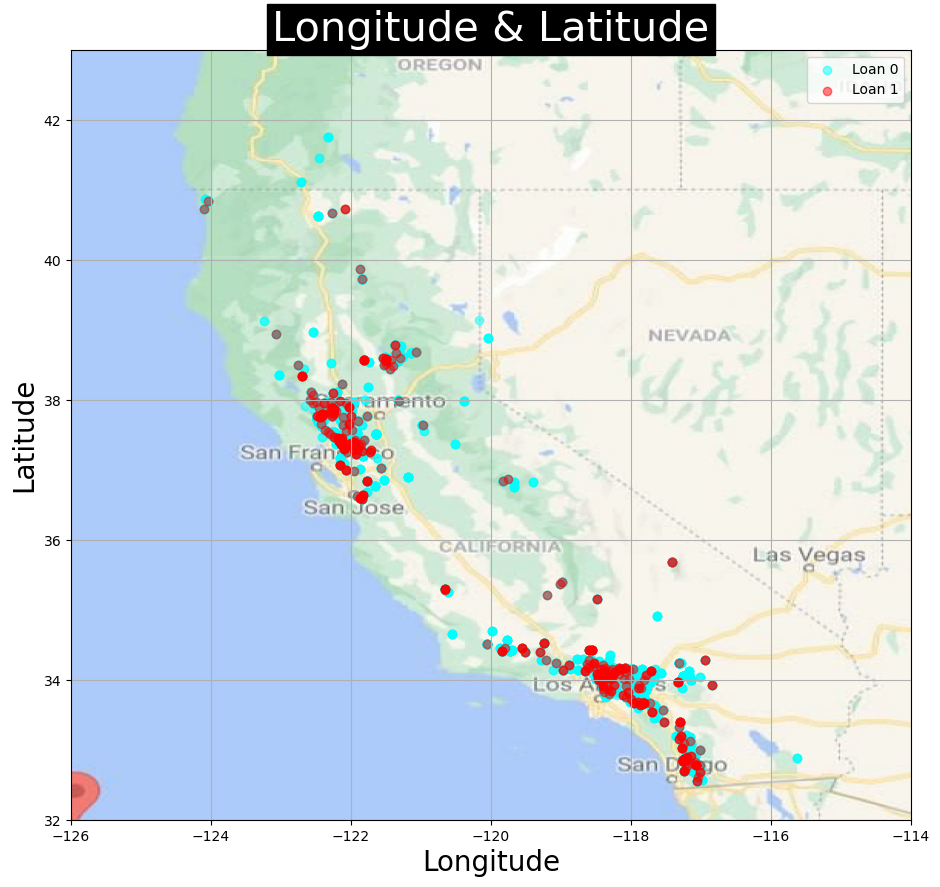

In [40]:

img= plt.imread("E:\Momeni-Machne Learning class momeni 21 01 1402\Machine Learning\zahra\session 22/map.jpg") # get image as file
# Seperation by personal loan
target_0 = df_for_maping[df_for_maping["Personal Loan"]==0]
target_1 = df_for_maping[df_for_maping["Personal Loan"]==1]
# plot
fig, axs=plt.subplots(figsize=(15,10))
# show image in background
axs.imshow(img,extent=[-126,-114,32,43],alpha=.7)
#scatter plot
axs.scatter(target_0['Longitude'],target_0['Latitude'],c='cyan',alpha=.5,label="Loan 0")
axs.scatter(target_1['Longitude'],target_1['Latitude'],c='r',alpha=.5,label="Loan 1")
plt.title('Longitude & Latitude',fontsize=30,backgroundcolor='black',c="white")# Title
plt.xlabel('Longitude' ,fontsize=20) # Xlabel
plt.ylabel('Latitude' ,fontsize=20) # Ylabel
plt.grid() # Line in plot 
plt.legend(loc='best') # help map
plt.show()


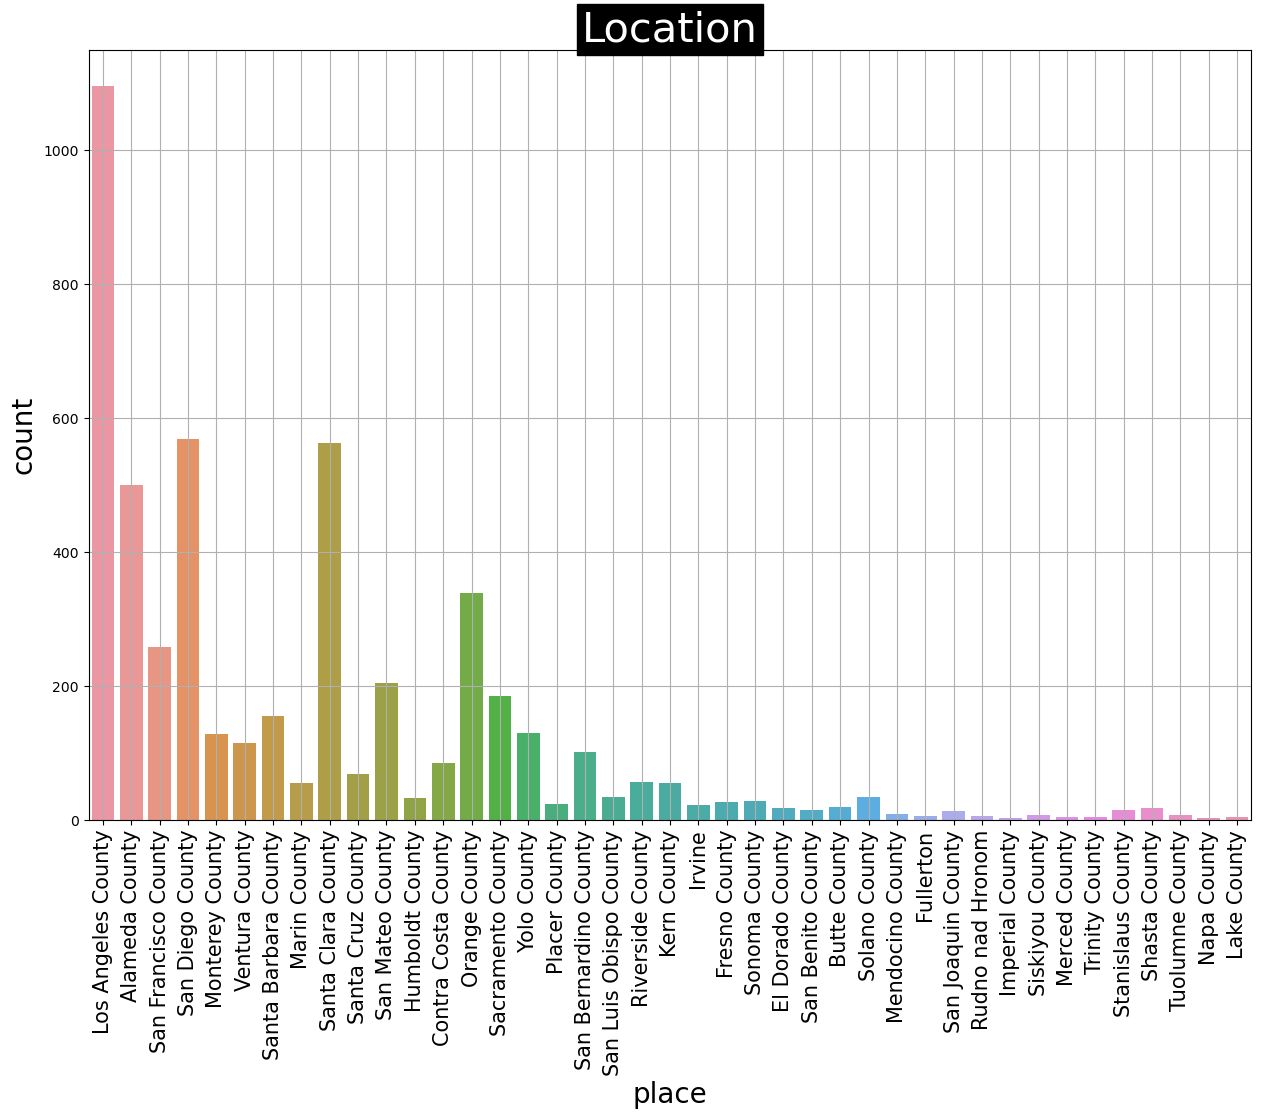

In [41]:
plt.figure(figsize=(15,10)) # Size plot
sns.countplot(x="Place",data=df) # Count sample for each place
plt.title('Location',fontsize=30,backgroundcolor='black',c='white') # Title
plt.grid() #Liner
plt.xticks(rotation=90, fontsize=15) #Xticks
plt.xlabel("place",fontsize=20)
plt.ylabel("count",fontsize=20)
plt.show()

In [42]:
# result of this count plot:
# Los Angeles is the location that recorded the most data (not that they loan more)
# in count plot if you change x into y .. it is better plot 

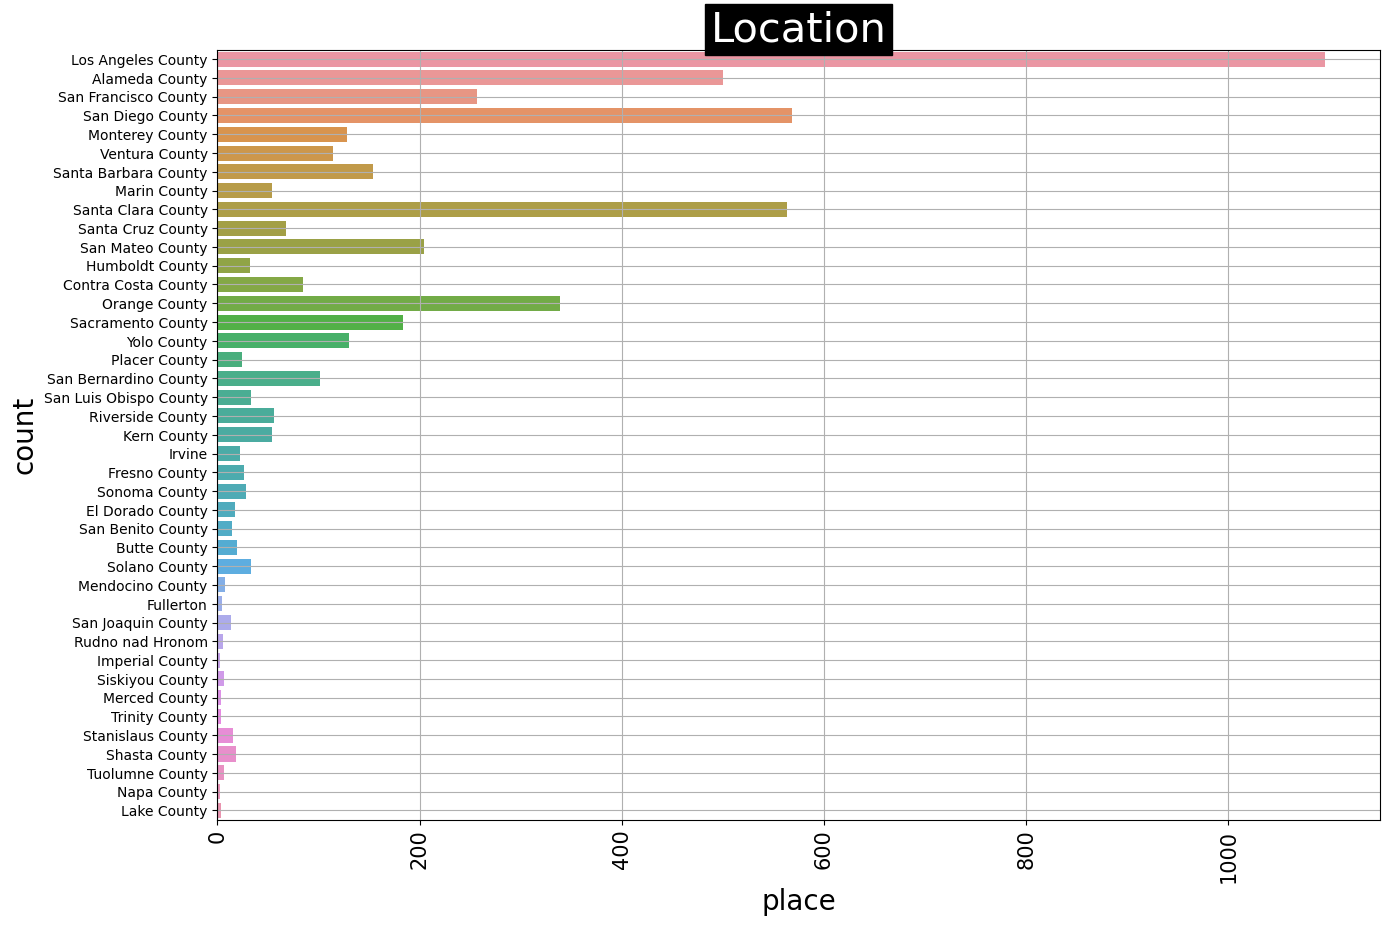

In [43]:
plt.figure(figsize=(15,10)) # Size plot
sns.countplot(y="Place",data=df) # Count sample for each place
plt.title('Location',fontsize=30,backgroundcolor='black',c='white') # Title
plt.grid() #Liner
plt.xticks(rotation=90, fontsize=15) #Xticks
plt.xlabel("place",fontsize=20)
plt.ylabel("count",fontsize=20)
plt.show()

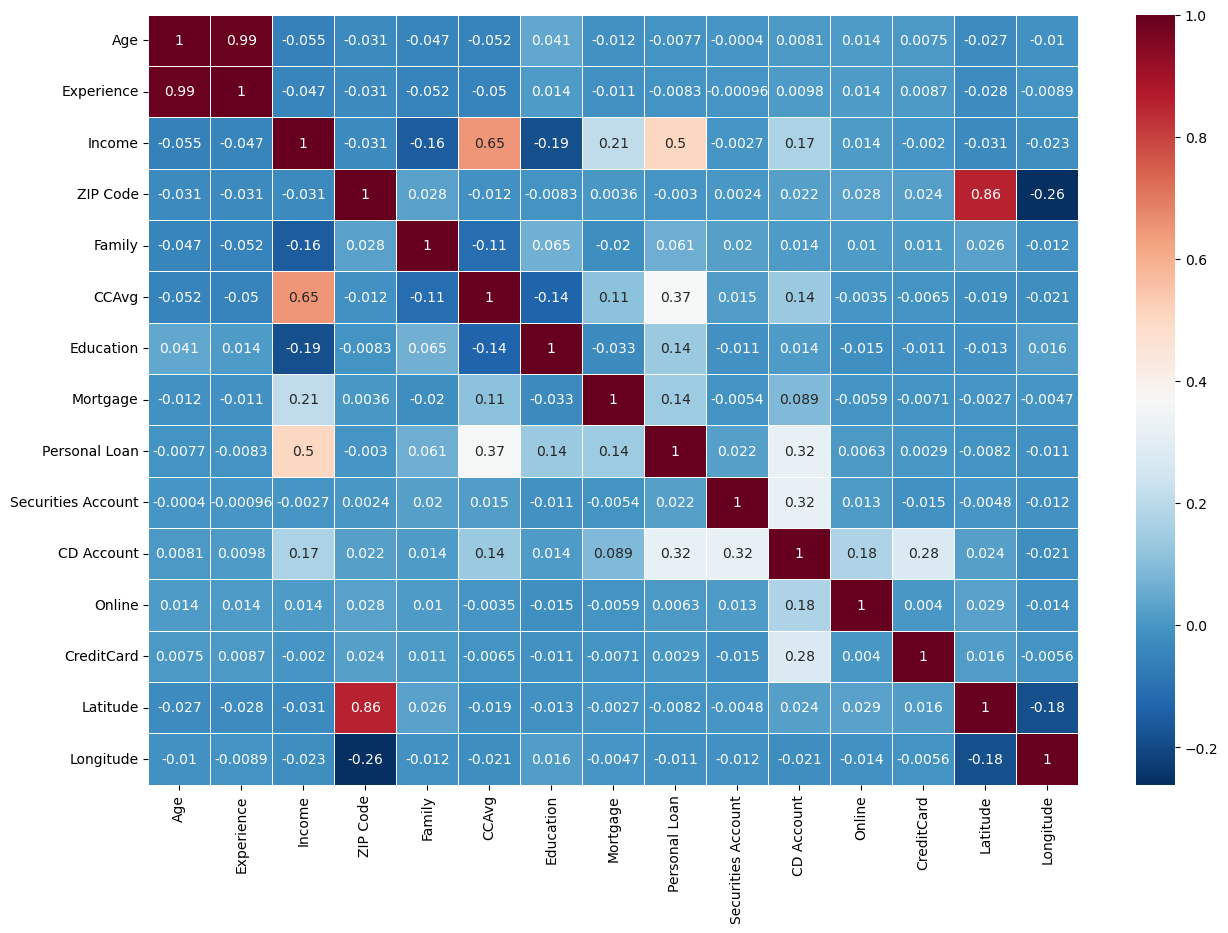

In [44]:
fig, ax=plt.subplots(figsize=(15,10)) # size of plot
sns.heatmap(df.corr(),cmap='RdBu_r',cbar=True,annot=True,linewidths=0.5,ax=ax) #plot heatmap
plt.show()

In [45]:
# result: we could check Big numbers.. for example:  
# personal loan have correlation (Direct relationship) with Income (0.5) 
#                                             CCAvg
#                                            Education
#                                            CD account
# CCAvg & Income have direct correlation # As one increases, the other increases


In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
# when we want to analyse relation between 3 parameters: Income,Age,Personal Loan 

(array([10., 20., 30., 40., 50., 60., 70., 80.]),
 [Text(0, 10.0, '10'),
  Text(0, 20.0, '20'),
  Text(0, 30.0, '30'),
  Text(0, 40.0, '40'),
  Text(0, 50.0, '50'),
  Text(0, 60.0, '60'),
  Text(0, 70.0, '70'),
  Text(0, 80.0, '80')])

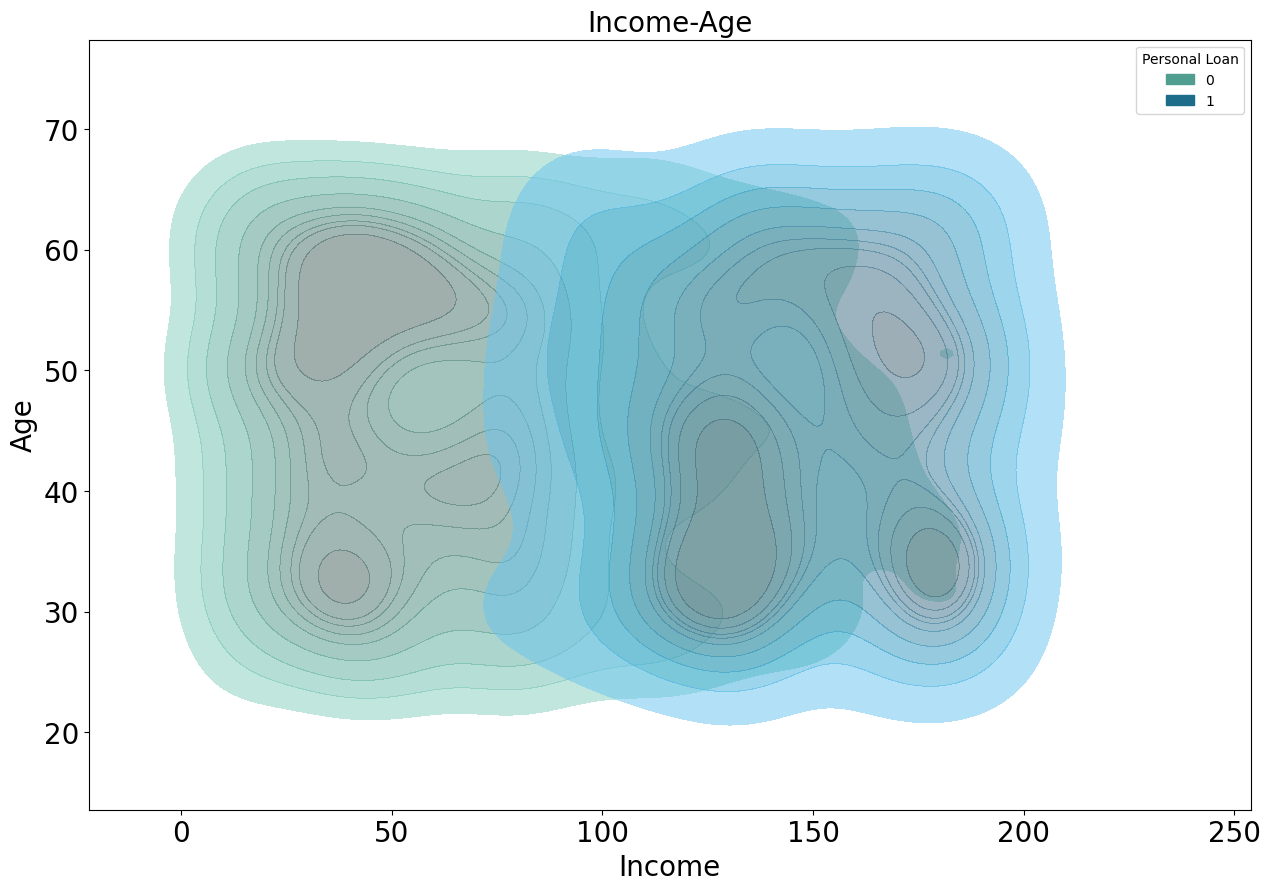

In [48]:
plt.figure(figsize=(15,10))
sns.kdeplot (data= df, x= df['Income'], y= df['Age'],hue='Personal Loan',shade=True,fill=True,common_norm=False,palette="crest", 
            alpha=.5, linewidth=0)
plt.title("Income-Age",fontsize=20)
plt.xlabel("Income",fontsize=20)
plt.ylabel("Age",fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

In [49]:
# Bolder colors get loan better: 
# for example: age:43~46 / income : 4-~50 get more loan 

(array([-40., -20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(0, -40.0, '−40'),
  Text(0, -20.0, '−20'),
  Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100'),
  Text(0, 120.0, '120'),
  Text(0, 140.0, '140'),
  Text(0, 160.0, '160')])

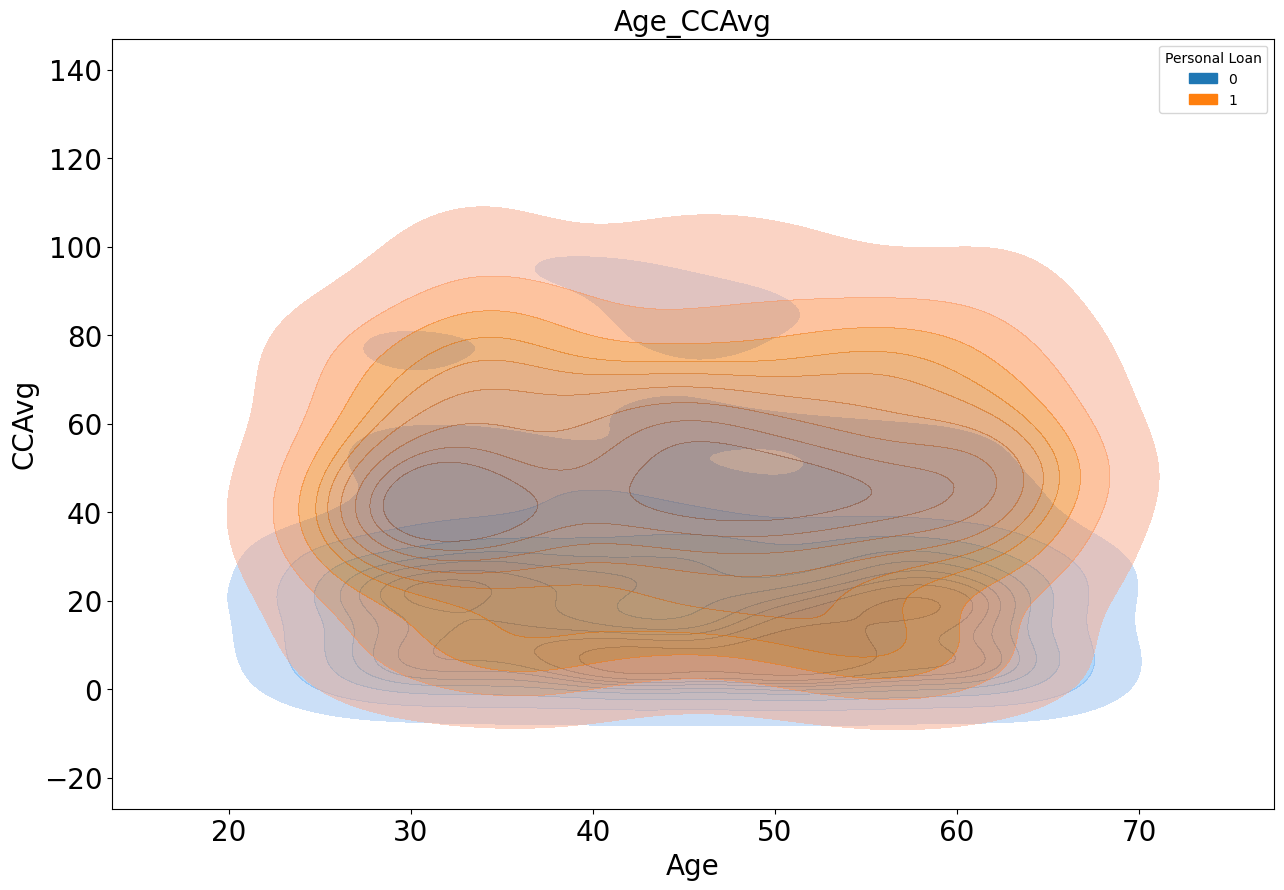

In [50]:
plt.figure(figsize=(15,10))
sns.kdeplot (data= df, x= df['Age'], y= df['CCAvg'],hue="Personal Loan",color='red', shade=True,fill=True,common_norm=False,
             alpha=.5, linewidth=0)
plt.title("Age_CCAvg",fontsize=20)
plt.xlabel("Age",fontsize=20)
plt.ylabel("CCAvg",fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

In [51]:
# It shows people who had lower CCAVg can get loan better 
# no matter age

In [52]:
# we donot need place..just used in analyze
x= df.drop(columns=['Personal Loan','Place'],axis=1)
y= df['Personal Loan'].values.reshape(-1,1) 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


# LogReg

In [53]:
logreg=LogisticRegression(solver='liblinear',C=50)
logreg.fit(x_train,y_train.ravel())
y_pred=logreg.predict(x_test)
print('f1 score is:',metrics.f1_score(y_test,y_pred))

f1 score is: 0.3142857142857143


In [54]:
# increase dimension, if you want to use regression ,
def Replace(dataframe):
    dataframe=df.copy()
    dataframe['Education'].replace([1,2,3],[4,5,6],inplace=True)
    dataframe['Securities Account'].replace([1,2],[3,4],inplace=True)
    dataframe['CD Account'].replace([1,2],[3,4],inplace=True)
    dataframe['Online'].replace([1,2],[3,4],inplace=True)
    dataframe['CreditCard'].replace([1,2],[3,4],inplace=True)
    return (dataframe)

In [55]:
# This function take data and test size next get x train,y train,ytest

def Logreg(X,y,Testsize):
    df_evaluation=pd.DataFrame()
    for x in Testsize:
        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=x,random_state=0)
        logreg=LogisticRegression(solver='liblinear',class_weight='balanced')
        logreg.fit(X_train,y_train)
        y_pred=logreg.predict(X_test)
        dict={'Test_size':x,'acc':metrics.accuracy_score(y_test,y_pred),"score":logreg.score(X,y)}
        df_evaluation=df_evaluation.append(dict,ignore_index=True)
    return(X_train,X_test,y_train,y_test,y_pred,df_evaluation)
# This function highlights Maximum values
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]
    

In [56]:
df_r = Replace(df)
X = df_r.drop(columns=['Personal Loan','Place'])
y = df_r['Personal Loan'].values.reshape(-1,1)


In [57]:
X_train,X_test,y_train,y_test,y_pred,df_evaluation = Logreg(X,y,[.1,.15,.2,.25,.3])
df_evaluation.style.apply(highlight_max)

,Test_size,acc,score
0,0.100000,0.898000,0.896979
1,0.150000,0.900000,0.896979
2,0.200000,0.909000,0.895779
3,0.250000,0.904800,0.893179
4,0.300000,0.900667,0.897179


In [58]:
# maximum is yellow

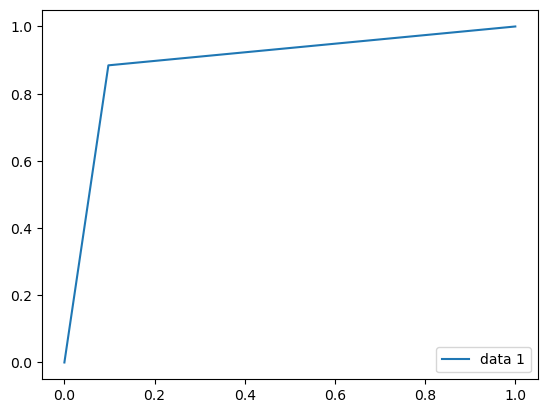

In [59]:
fpr,tpr, _=metrics.roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,label="data 1")
plt.legend(loc=4)
plt.show()

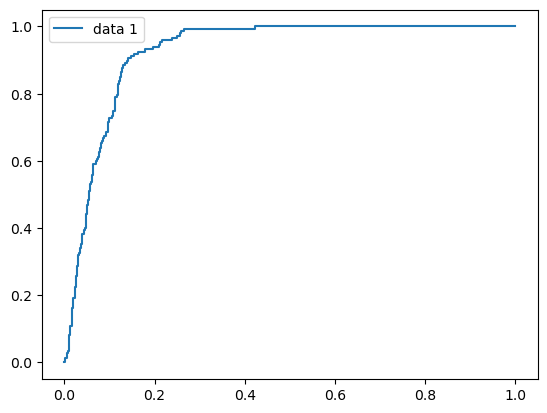

In [60]:
y_pred_proba=logreg.predict_proba(X_test)[::,1]
fpr,tpr, _=metrics.roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr,label="data 1")
plt.legend(loc='best')
plt.show()

In [61]:
confusion_matrix(y_test,y_pred)

array([[1221,  132],
       [  17,  130]], dtype=int64)

# Acc=0.9(That is good)

In [62]:
solvers= ['newton-cg','liblinear','lbfgs','sag','saga']

In [63]:
def Logreg(X,y,Testsize):
    df_evaluation=pd.DataFrame()
    for x in Testsize:
        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=x,random_state=0)
        logreg=LogisticRegression(solver='newton-cg',class_weight='balanced')
        logreg.fit(X_train,y_train)
        y_pred=logreg.predict(X_test)
        dict={'Test_size':x,'acc':metrics.accuracy_score(y_test,y_pred),"score":logreg.score(X,y)}
        df_evaluation=df_evaluation.append(dict,ignore_index=True)
    return(X_train,X_test,y_train,y_test,y_pred,df_evaluation)
# This function highlights Maximum values
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]
    

In [64]:
X_train,X_test,y_train,y_test,y_pred,df_evaluation = Logreg(X,y,[.1,.15,.2,.25,.3])
df_evaluation.style.apply(highlight_max)

,Test_size,acc,score
0,0.100000,0.902000,0.898380
1,0.150000,0.905333,0.898380
2,0.200000,0.913000,0.896179
3,0.250000,0.905600,0.895179
4,0.300000,0.901333,0.899580


# Solver: newton-cg >>>>>>>>>> ACC=0.91

In [67]:
def Logreg(X,y,Testsize):
    df_evaluation=pd.DataFrame()
    for x in Testsize:
        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=x,random_state=0)
        logreg=LogisticRegression(solver='lbfgs',class_weight='balanced')
        logreg.fit(X_train,y_train)
        y_pred=logreg.predict(X_test)
        dict={'Test_size':x,'acc':metrics.accuracy_score(y_test,y_pred),"score":logreg.score(X,y)}
        df_evaluation=df_evaluation.append(dict,ignore_index=True)
    return(X_train,X_test,y_train,y_test,y_pred,df_evaluation)
# This function highlights Maximum values
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]
    

In [68]:
X_train,X_test,y_train,y_test,y_pred,df_evaluation = Logreg(X,y,[.1,.15,.2,.25,.3])
df_evaluation.style.apply(highlight_max)

,Test_size,acc,score
0,0.100000,0.862000,0.857772
1,0.150000,0.861333,0.862372
2,0.200000,0.872000,0.862372
3,0.250000,0.869600,0.857572
4,0.300000,0.869333,0.857972


# Solver: lbfgs >>>>>>>>>> ACC=0.87

In [70]:
def Logreg(X,y,Testsize):
    df_evaluation=pd.DataFrame()
    for x in Testsize:
        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=x,random_state=0)
        logreg=LogisticRegression(solver='sag',class_weight='balanced')
        logreg.fit(X_train,y_train)
        y_pred=logreg.predict(X_test)
        dict={'Test_size':x,'acc':metrics.accuracy_score(y_test,y_pred),"score":logreg.score(X,y)}
        df_evaluation=df_evaluation.append(dict,ignore_index=True)
    return(X_train,X_test,y_train,y_test,y_pred,df_evaluation)
# This function highlights Maximum values
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]
    

In [71]:
X_train,X_test,y_train,y_test,y_pred,df_evaluation = Logreg(X,y,[.1,.15,.2,.25,.3])
df_evaluation.style.apply(highlight_max)

,Test_size,acc,score
0,0.100000,0.878000,0.889378
1,0.150000,0.893333,0.903981
2,0.200000,0.101000,0.096019
3,0.250000,0.364800,0.350470
4,0.300000,0.904000,0.905981


# Solver: sag >>>>>>>>>> ACC=0.9

In [73]:
def Logreg(X,y,Testsize):
    df_evaluation=pd.DataFrame()
    for x in Testsize:
        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=x,random_state=0)
        logreg=LogisticRegression(solver='saga',class_weight='balanced')
        logreg.fit(X_train,y_train)
        y_pred=logreg.predict(X_test)
        dict={'Test_size':x,'acc':metrics.accuracy_score(y_test,y_pred),"score":logreg.score(X,y)}
        df_evaluation=df_evaluation.append(dict,ignore_index=True)
    return(X_train,X_test,y_train,y_test,y_pred,df_evaluation)
# This function highlights Maximum values
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]
    

In [74]:
X_train,X_test,y_train,y_test,y_pred,df_evaluation = Logreg(X,y,[.1,.15,.2,.25,.3])
df_evaluation.style.apply(highlight_max)

,Test_size,acc,score
0,0.100000,0.838000,0.845369
1,0.150000,0.873333,0.880176
2,0.200000,0.101000,0.096019
3,0.250000,0.787200,0.784157
4,0.300000,0.098000,0.096019


# Solver: saga >>>>>>>>>> ACC=0.9

# Gridsearch ------> for imporoving our model

In [78]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
logreg2= LogisticRegression(solver='newton-cg',max_iter=5000,n_jobs=-1)
params={'penalty':['12','none'],'C':[0.1,0.2,0.5,1,2,5,10,20,50,100,200],
         'class_weight':[None,'balanced'],'warm_start':[False,True]}
Kfold=KFold(n_splits=5,shuffle=True,random_state=2)
gridsearch=GridSearchCV(logreg2,param_grid=params,scoring='f1',n_jobs=-1,cv=Kfold)

In [79]:
gridsearch.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=2, shuffle=True),
             estimator=LogisticRegression(max_iter=5000, n_jobs=-1,
                                          solver='newton-cg'),
             n_jobs=-1,
             param_grid={'C': [0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100, 200],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['12', 'none'],
                         'warm_start': [False, True]},
             scoring='f1')

In [80]:
print(gridsearch.best_params_)
print(gridsearch.best_score_)

{'C': 0.1, 'class_weight': None, 'penalty': 'none', 'warm_start': False}
0.727014970469605


# Do this for another solvers with another classes weights

# KNN

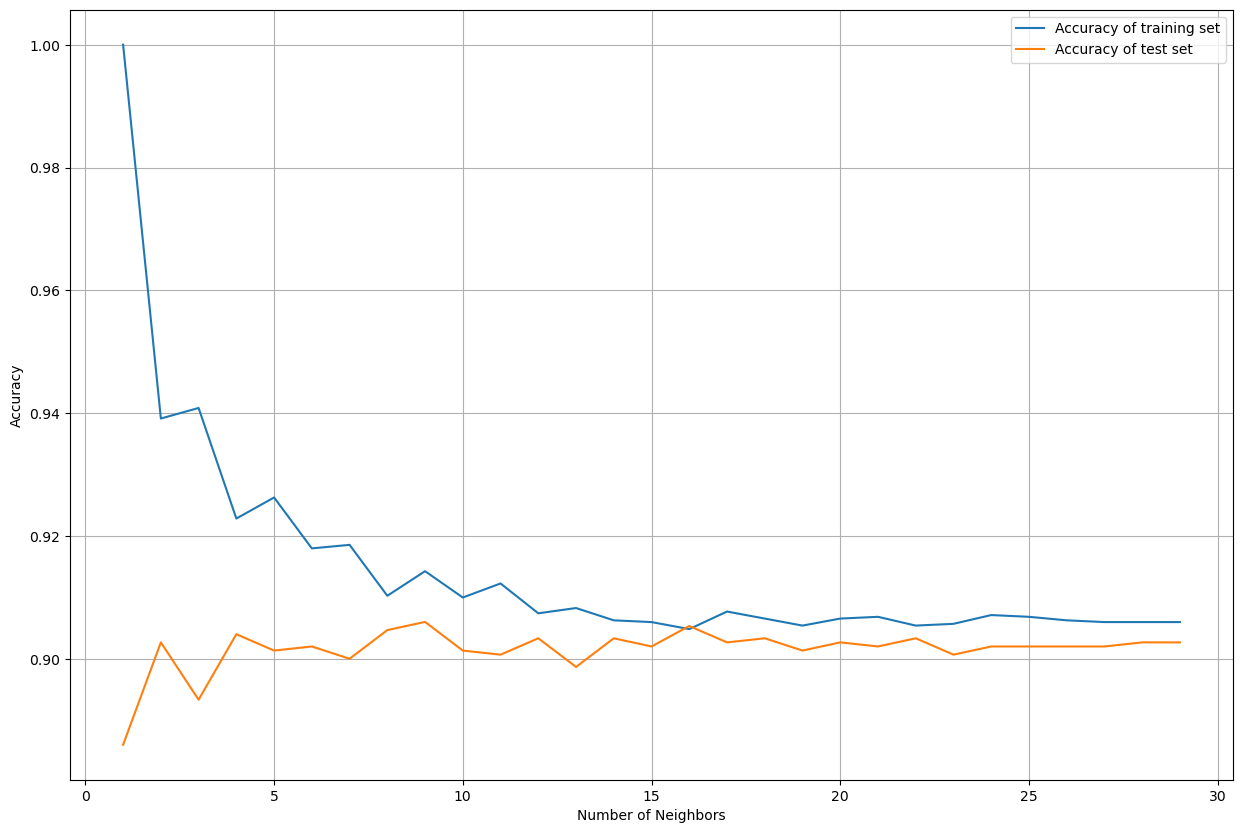

In [83]:
training_acc =[]
test_acc= []
neighbors_setting = range(1,30)

for n_neighbors in neighbors_setting:
    knn_model = KNeighborsClassifier(n_neighbors =n_neighbors)
    knn_model.fit(X_train,y_train.ravel())
    training_acc.append(knn_model.score(X_train,y_train))
    test_acc.append(knn_model.score(X_test,y_test))
    
plt.figure(figsize=(15,10))
plt.plot(neighbors_setting,training_acc, label='Accuracy of training set')
plt.plot(neighbors_setting,test_acc, label='Accuracy of test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.grid()
plt.legend()

In [84]:
print(np.max(training_acc))
print(np.max(test_acc))

1.0
0.906


In [86]:
knn_model = KNeighborsClassifier(9)
knn_model.fit(X_train,y_train.ravel())
y_pred=knn_model.predict(X_test)
print("Accuracy for knn :", metrics.accuracy_score(y_test,y_pred))
    

Accuracy for knn : 0.906


In [87]:
confusion_matrix(y_test,y_pred)

array([[1333,   20],
       [ 121,   26]], dtype=int64)

# This con_matx is for LogReg
# ([[1220,133],
# [17, 130]], dtype=int64)

In [91]:
# result 
# Logre & KNN both accuracy are the same , but THeir result is the same? NO .. 
# I mean their confusion matrix are not the same 
# error & cost is important
# 


In [90]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors': range(1,30)}
gridsearch2= GridSearchCV(estimator = knn_model ,#model
                       param_grid = parameters,#range of k
                       scoring = 'f1',#strategy to evaluate the performance
                      # of the cross_validation model on the test set.
                       cv=5,# cross_validation generator
                       verbose=1,# time to calculate
                       n_jobs=-1)# help to CPU
 
gridsearch2.fit(X_train,y_train.ravel())
gridsearch2.best_params_

Fitting 5 folds for each of 29 candidates, totalling 145 fits


{'n_neighbors': 1}

In [92]:
print(gridsearch2.best_params_)
print(gridsearch2.best_score_)

{'n_neighbors': 1}
0.36784109717905666


# Gridsearch for LogReg 
# {'C': 0.1, 'class_weight': None, 'penalty': 'none', 'warm_start': False}
# 0.727014970469605

# Nive Bayes 
# Comlplement 

In [97]:
X=df.drop(columns=['Personal Loan','Place','Latitude','Longitude']) # complement cant have negative values
y = df['Personal Loan']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
clf=ComplementNB()
clf.fit(x_train,y_train.ravel())
y_pred=clf.predict(x_test)
print('Accuracy:' ,metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.794


# Naive Bayes algorithm is not suitable for this data
# "imbalanced classification" instead of "unbalanced classification"
# There are perhaps two main groups of causes for the imbalance we may want to consider; they are data sampling 
# and properties of the domain. 

In [99]:
# slight Imbalance. an imbalanced classification problem where the distribution of examples is uneven by a small amount 
# in the training dataset (e,g, 4:6).
# severe Imbalance. an imbalanced classification problem where the distribution of examples is uneven by a large amount 
# in the training dataset (e,g, 1:100 or more ).

In [100]:
df['Personal Loan'].value_counts()

0    4519
1     480
Name: Personal Loan, dtype: int64

In [101]:
# ratio  9.4 ---> it means for every 10 people .. 9 people no.. 1 people yes ..in loan
4519/480

9.414583333333333

In [102]:
# imbalance distribution (1:9.41)

In [103]:
# Majority Class: The class (or classes) in an imbalanced classification predictive modeling problem that has many 
# examples.
# Minority Class: The class (or classes) in an imbalanced classification predictive modeling problem that has few 
# examples.